In [2]:
import json
with open('gearnet_pipeline.json', 'r') as f:
    data = json.load(f)


at 1, 0: {'micro_auroc': 0.8196225166320801, 'mcc': 0.3301183013668777}
at 1, 1: {'micro_auroc': 0.8195362091064453, 'mcc': 0.33512143883906154}
at 1, 2: {'micro_auroc': 0.8200726509094238, 'mcc': 0.3306622918319514}
at 2, 0: {'micro_auroc': 0.8552672266960144, 'mcc': 0.40132861724737323}
at 2, 1: {'micro_auroc': 0.8660364747047424, 'mcc': 0.41809534247906865}
at 2, 2: {'micro_auroc': 0.8634570837020874, 'mcc': 0.40082418783399965}
at 3, 0: {'micro_auroc': 0.8664599657058716, 'mcc': 0.40369168878631156}
at 3, 1: {'micro_auroc': 0.8609002828598022, 'mcc': 0.40575956905514443}
at 3, 2: {'micro_auroc': 0.8698959946632385, 'mcc': 0.43342405450639643}
at 4, 0: {'micro_auroc': 0.8733177781105042, 'mcc': 0.40972309019291664}
at 4, 1: {'micro_auroc': 0.8525958061218262, 'mcc': 0.3762885909224873}
at 4, 2: {'micro_auroc': 0.86258465051651, 'mcc': 0.3940172365109485}
at 5, 0: {'micro_auroc': 0.8515436053276062, 'mcc': 0.352774144059186}
at 5, 1: {'micro_auroc': 0.8593966960906982, 'mcc': 0.39951

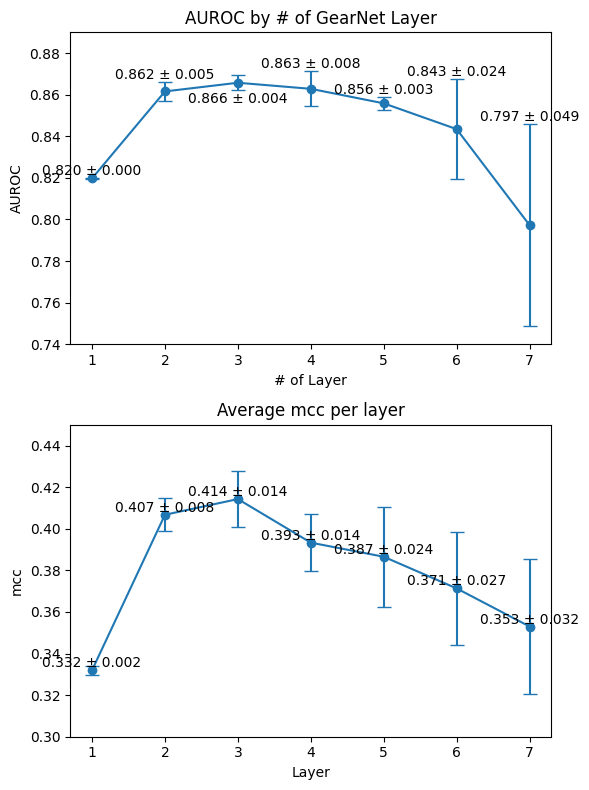

In [19]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

layers = list(range(1, 8))

avg_metrics = {'micro_auroc': [], 'mcc': []}
std_metrics = {'micro_auroc': [], 'mcc': []}

for layer in layers:
    layer_data = [d for d in data if d['layer'] == layer]

    metrics = {'micro_auroc': [], 'mcc': []}
    for trial in range(3):
        trial_data = [d for d in layer_data if d['trial'] == trial]
        last_epoch_metric = trial_data[-1]['data']
        print(f'at {layer}, {trial}: {last_epoch_metric}')

        metrics['micro_auroc'].append(last_epoch_metric['micro_auroc'])
        metrics['mcc'].append(last_epoch_metric['mcc'])

    avg_metrics['micro_auroc'].append(np.mean(metrics['micro_auroc']))
    avg_metrics['mcc'].append(np.mean(metrics['mcc']))
    std_metrics['micro_auroc'].append(np.std(metrics['micro_auroc']))
    std_metrics['mcc'].append(np.std(metrics['mcc']))

# Plotting
fig, axs = plt.subplots(2, figsize=(6, 8))

# micro_auroc plot
axs[0].errorbar(layers, avg_metrics['micro_auroc'],
                yerr=std_metrics['micro_auroc'], fmt='-o', capsize=5)
axs[0].set_title('AUROC by # of GearNet Layer')
axs[0].set_xlabel('# of Layer')
axs[0].set_ylabel('AUROC')
axs[0].set_ylim([0.74, 0.89])

# Add labels to micro_auroc data points
for layer, avg, std in zip(layers, avg_metrics['micro_auroc'], std_metrics['micro_auroc']):
    axs[0].text(layer, avg+(std if layer != 3 else -3*std), '%.3f ± %.3f' %
                (avg, std), ha='center', va='bottom')

# mcc plot
axs[1].errorbar(layers, avg_metrics['mcc'],
                yerr=std_metrics['mcc'], fmt='-o', capsize=5)
axs[1].set_title('Average mcc per layer')
axs[1].set_xlabel('Layer')
axs[1].set_ylabel('mcc')
axs[1].set_ylim([0.3, 0.45])

# Add labels to mcc data points
for layer, avg, std in zip(layers, avg_metrics['mcc'], std_metrics['mcc']):
    axs[1].text(layer, avg, '%.3f ± %.3f' %
                (avg, std), ha='center', va='bottom')

plt.tight_layout()
plt.show()
